# Regularization

#### **Einführung in die Neuroinformatik - Blatt09**

*Gruppe AC*

**Teilaufgabe 1**

a) Für den Gradienten der Fehlerfunktion erhält man:  
> $\nabla E(w(t)) = \nabla E_0(w(t)) + \frac{\lambda}{2} \sum_{l = 1}^L \sum_i \sum_j 2 * w_{ij}^{(l)} = \nabla E_0(w(t)) + \lambda \sum_{l = 1}^L \sum_i \sum_j w_{ij}^{(l)}$  

Somit ergibt sich für die Lernregel für ein einzelnes Gewicht:
> $w(t+1) = w(t) - \eta * \nabla E(w(t)) = w(t) - \eta * (\nabla E_0(w(t)) + \lambda w(t)) = (1 - \eta \lambda) w(t) - \eta \nabla E_0(w(t))$

b)  
i.  Es gilt:  
> $w(10) = (1 - \eta \lambda)^{10} w(0) = (1 - 0.8 * 0.5)^{10} * 2 = 0.0121$

ii. Das Gewicht nimmt exponentiell ab.  
iii. Es gilt:
> $ \lim_{t \to \infty} w(t) = \lim_{t \to \infty} (1 - \eta \lambda)^t w(0) = 0$

da $(1 - \eta \lambda) < 1)$ ist.  
iv. Gleichung (4) gilt nun nicht mehr notwendigerweise, da zwar der Term $(1- \eta \lambda)w(t)$ weiterhin verschwindet, dies jedoch für den Term $\eta \nabla E_0(w(t))$ nicht gelten muss.

c) Ja, es hilft das Problem aus Aufgabe 1 einzudämmen, da die Gewichte dann nicht mehr so groß werden.

**Teilaufgabe 2**

Auf Blatt03 waren die Lernregeln gegeben durch:
> $w(t+1) = w(t) + \eta (T_{\mu}-y(x_{\mu})) f'(wx_{\mu}+b)x_{\mu}$  
> $b(t+1) = b(t) + \eta (T_{\mu}-y(x_{\mu})) f'(wx_{\mu}+b)$  

Man kann erkennen, dass in der Lernregel für den Bias der Faktor $x_{\mu}$ wegfällt, weshalb der Bias weniger stark vom Input abhängt als die Gewichte.

**Teilaufgabe 3**

<img src="aufgabe2_3.jpg" width = "300" height = "60"/>

**Teilaufgabe 4**

In [123]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [124]:
area = np.array([68.9, 40.5, 33.42, 73, 74.11, 76, 61.51, 52, 70, 76.6, 20, 32, 58, 45, 27, 33], np.float64)
price = np.array([720, 520, 420, 955, 785, 897, 830, 670, 900, 885, 480, 620, 860, 550, 290, 320], np.float64)

In [125]:
#Preprocessing
scaler1 = StandardScaler()
scaled_area = scaler1.fit_transform(area.reshape(-1, 1))
scaler2 = StandardScaler()
scaled_price = scaler2.fit_transform(price.reshape(-1, 1))

In [126]:
def train_network(l2_reg):
    
    model = keras.Sequential([
        layers.Dense(50, activation = 'tanh', kernel_regularizer = regularizers.l2(l = l2_reg)),
        layers.Dense(1, activation = 'linear')])
    
    model.compile(optimizer = optimizers.Adam(lr = 0.1), loss = 'mean_squared_error')
    
    model.fit(scaled_area, scaled_price, epochs = 3000, verbose = 0)
    
    return model

In [127]:
#train two models
model1 = train_network(0)
model2 = train_network(0.05)

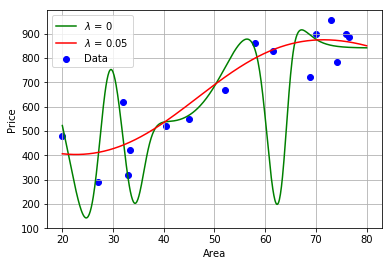

In [129]:
#test
x = np.linspace(20, 80, 601, endpoint = True)
scaled_x = scaler1.fit_transform(x.reshape(x.shape[0], -1))

scaled_result1 = model1.predict(scaled_x)
scaled_result2 = model2.predict(scaled_x)

result1 = scaler2.inverse_transform(scaled_result1)
result2 = scaler2.inverse_transform(scaled_result2)

#plot
plt.scatter(area, price, c = 'b', label = 'Data')
plt.plot(x, result1, 'g', label = '$\lambda$ = 0')
plt.plot(x, result2, 'r', label = '$\lambda$ = 0.05')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid()